In [1]:
import os
import numpy as np
import pickle
# import imageio
import cv2 as cv 
import matplotlib.pyplot as plt
import encode_imagecopy as ecode
from PIL import Image 
import argparse
import json
import struct
import sys
import array
from random import shuffle

In [146]:
def unpickle(file):
    fo = open(path, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

directory_path = "/root/autodl-tmp/code/code_xwd/dataset/Fashion-MNIST"
path = f"{directory_path}/benign-3D/train"
save_path = f"{directory_path}/DBA-3D/train"


dict = unpickle(path)
test = []
for i in range(0, 60000):
    img = np.asarray(dict[i]).astype(np.int32).reshape(32, 32, 3)
    img = np.asarray(Image.fromarray(np.uint8(img), mode="RGB").convert("L"))
    #img[0][0:2] = 255
    #img[0][3:5] = 200
    #img[2][0:2] = 150
    #img[2][3:5] = 100
    
    img[:5,:5] = 255
    # 白块中间十字
    img[2,0:5] = 0
    img[0:5,2] = 0
    
    """
    img[:3,:3] = 255
    # 白块中间十字
    img[1,0:3] = 0
    img[0:3,1] = 0
    """
    
    img = Image.fromarray(np.uint8(img), mode="L").convert("RGB")
    # img = np.array(img)
    test.append(img)

    
    
f1 = open(save_path, 'wb+')
pickle.dump(test, f1)
f1.close()

In [127]:
directory_path = "/root/autodl-tmp/code/code_xwd/dataset/Fashion-MNIST"
path = f"{directory_path}/benign-3D/train"

dict = unpickle(path)

print(len(dict))
print(type(dict[0]))


60000
<class 'PIL.Image.Image'>


(32, 32, 3)


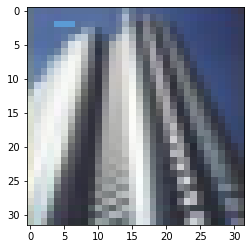

In [76]:
def unpickle(file):
    fo = open(path, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict
"""
directory_path = "/root/autodl-tmp/code/code_xwd/dataset/Fashion-MNIST"
path = f"{directory_path}/DBA-3D/train"
"""
directory_path = "/root/autodl-tmp/code/code_xwd/dataset/cifar100-DBA"
path = f"{directory_path}/train"

dict = unpickle(path)
dict = dict.get("data")
# print(type(dict[110]))
# print(dict[0].shape)


img1 = np.array(dict[2-1])
img2 = np.reshape(img1, (32, 32, 3))
img3 = Image.fromarray(img2,mode="RGB")#.convert("RGB")

image_m = np.reshape(dict[40000], (3, 32, 32))
r = image_m[0, :, :]
g = image_m[1, :, :]
b = image_m[2, :, :]
img32 = np.array(cv.merge([r, g, b]))

print(np.array(img3).shape)
plt.figure()
plt.imshow(img32)
plt.show()